# Analysis New Dataset (Dr. Samsul)
This notebook is used to analyze the new dataset from Dr. Samsul, which contains images of cataract and non-cataract patients.

In [1]:
import os

import cv2

import pandas as pd

from utils.analyzer.image import (
    get_average_color_channels,
    get_brightness,
    get_contrast,
    get_sharpness,
    calculate_iqr,
    get_total_channel_average,
    get_total_channel_std, get_outliers_iqr
)

from utils.analyzer.visualization import (
    draw_box_plot_iqr,
    draw_histogram_distribution,
    analyze_image_quality_batch_with_flags
)


In [2]:
dir_path = os.getcwd() + '/dataset/classified'
dataset_positive_key = 'positive'
dataset_negative_key = 'negative'
dataset_positive = os.listdir(dir_path + '/' + dataset_positive_key)
dataset_negative = os.listdir(dir_path + '/' + dataset_negative_key)
dataset_save_filename = "dataset_dr_samsul.xlsx"

headers = ['filename', 'label', 'average_r', 'average_g',
           'average_b', 'brightness', 'contrast', 'sharpness',
           'z_score_r', 'z_score_g', 'z_score_b',
           'iqr_r', 'iqr_g', 'iqr_b',
           'outliers_r', 'outliers_g', 'outliers_b',
           'outliers_brightness', 'outliers_contrast', 'outliers_sharpness',
           'is_blurry', 'is_dark', 'is_overexposed']
dataset_positive_pd = pd.DataFrame(columns=headers)
dataset_negative_pd = pd.DataFrame(columns=headers)

def check_and_store_data(dataset, df, parent_path, parent_key, label):
    for data in dataset:
        full_path = os.path.join(parent_path, parent_key, data)
        img = cv2.imread(full_path)

        if img is None:
            print(f"Image {full_path} could not be read.")
            continue

        color_channels = get_average_color_channels(img)
        brightness = get_brightness(img)
        contrast = get_contrast(img)
        sharpness = get_sharpness(img)

        data_pd = pd.DataFrame({
            'filename': [data],
            'label': [label],
            'average_r': [color_channels[0]],
            'average_g': [color_channels[1]],
            'average_b': [color_channels[2]],
            'brightness': [brightness],
            'contrast': [contrast],
            'sharpness': [sharpness]
        }, index=[0])

        df = pd.concat([df, data_pd], ignore_index=True)

    df['z_score_r'] = (df['average_r'] - df['average_r'].mean()) / df['average_r'].std()
    df['z_score_g'] = (df['average_g'] - df['average_g'].mean()) / df['average_g'].std()
    df['z_score_b'] = (df['average_b'] - df['average_b'].mean()) / df['average_b'].std()

    df['iqr_r'] = calculate_iqr(df['average_r'])[0]
    df['iqr_g'] = calculate_iqr(df['average_g'])[0]
    df['iqr_b'] = calculate_iqr(df['average_b'])[0]

    outliers_r = get_outliers_iqr(df, 'average_r')
    outliers_g = get_outliers_iqr(df, 'average_g')
    outliers_b = get_outliers_iqr(df, 'average_b')

    outliers_brightness = get_outliers_iqr(df, 'brightness')
    outliers_contrast = get_outliers_iqr(df, 'contrast')
    outliers_sharpness = get_outliers_iqr(df, 'sharpness')

    df['outliers_r'] = False
    df['outliers_g'] = False
    df['outliers_b'] = False
    df['outliers_brightness'] = False
    df['outliers_contrast'] = False
    df['outliers_sharpness'] = False

    df.loc[outliers_r.index, 'outliers_r'] = True
    df.loc[outliers_g.index, 'outliers_g'] = True
    df.loc[outliers_b.index, 'outliers_b'] = True
    df.loc[outliers_brightness.index, 'outliers_brightness'] = True
    df.loc[outliers_contrast.index, 'outliers_contrast'] = True
    df.loc[outliers_sharpness.index, 'outliers_sharpness'] = True

    return df

In [3]:
import warnings
warnings.filterwarnings("ignore")

dataset_positive_pd = check_and_store_data(
    dataset_positive,
    dataset_positive_pd,
    dir_path,
    dataset_positive_key,
    'positive'
)

dataset_negative_pd = check_and_store_data(
    dataset_negative,
    dataset_negative_pd,
    dir_path,
    dataset_negative_key,
    'negative'
)

## Positive Dataset Analysis

Berdasarkan historgram untuk data warna (r,g,b) cenderung memiliki nilai R dan G yang lebih tinggi dibanding B, ini menjukkan bahwa foto memiliki warna yang warm.

Kemudian untuk brightness dan contrast cenderung seimbang, artinya foto memiliki pencahayaan yang baik dan kontras yang cukup.

Sedangkan untuk sharpness, cenderung memiliki nilai yang tidak seimbang, ditandai dengan data yang berada di sisi kiri lebih banyak dibanding sisi kanan, ini menunjukkan bahwa foto memiliki ketajaman yang rendah (blur).

Apabila kita lihat dari box plot, data sharpness memiliki nilai outlier yang paling banyak, ini menunjukkan bahwa ada beberapa foto yang memiliki ketajaman yang sangat rendah (blur) dibanding foto lainnya.



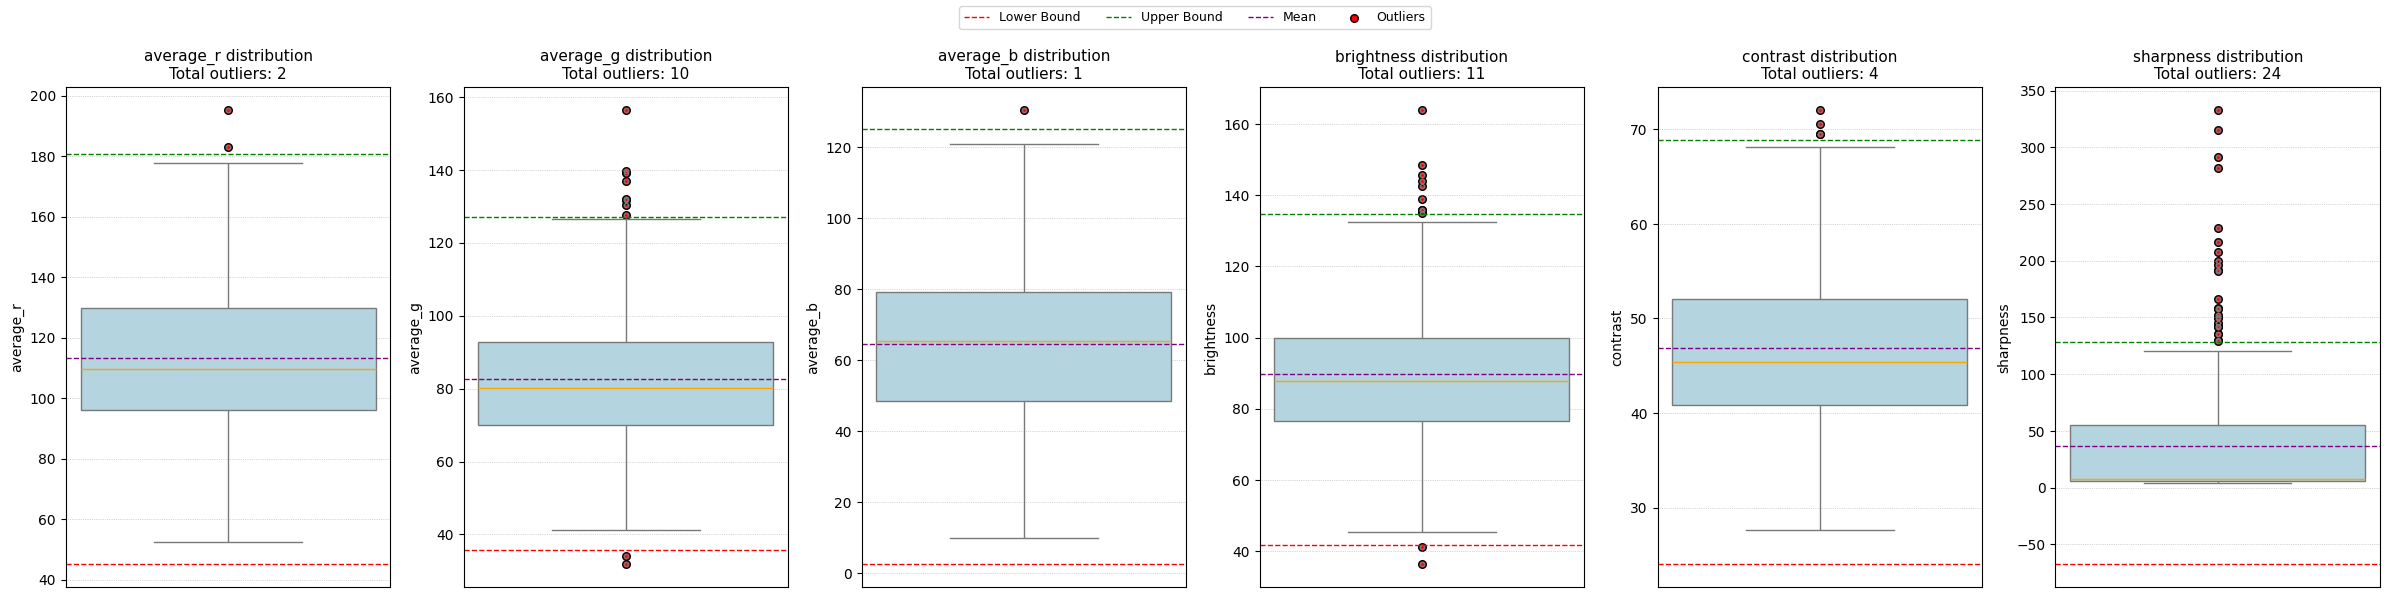

In [4]:
draw_box_plot_iqr(dataset_positive_pd, ['average_r', 'average_g', 'average_b', 'brightness', 'contrast', 'sharpness'])

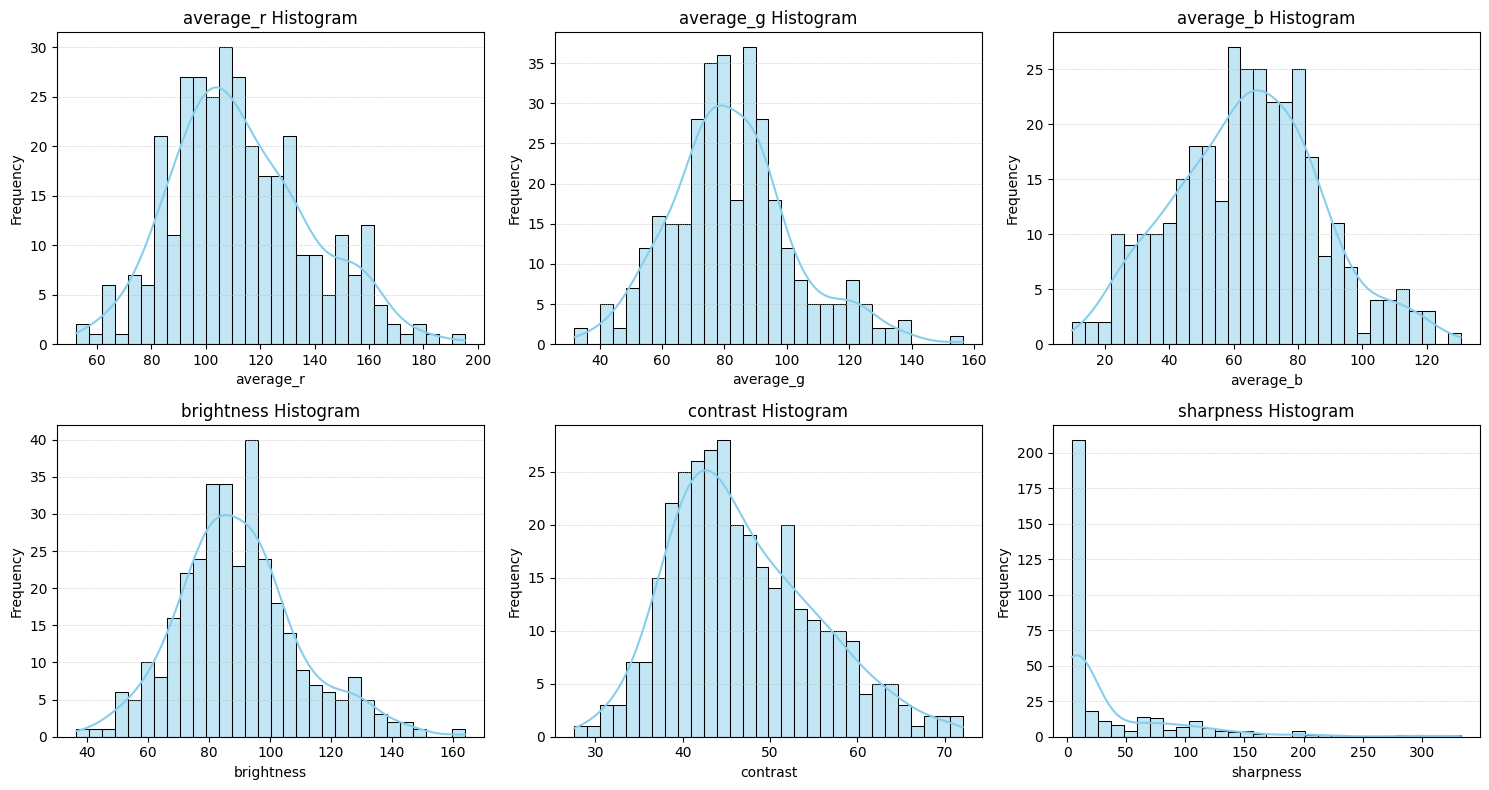

In [5]:
draw_histogram_distribution(dataset_positive_pd, ['average_r', 'average_g', 'average_b', 'brightness', 'contrast', 'sharpness'])

## Negative Dataset Analysis

Berdasarkan historgram untuk data warna (r,g,b) menunjukkan bahwa data memiliki distribusi yang normal, artinya foto memiliki warna yang seimbang antara R, G, dan B.

kemudian untuk brightness dan contrast menunjukkan bahwa foto memiliki pencahayaan yang baik dan kontras yang cukup.

Sedangkan untuk sharpness, menunjukkan bahwa data memiliki distribusi yang tidak normal, artinya foto memiliki ketajaman yang rendah (blur).

Apabila kita lihat dari box plot, data sharpness memiliki nilai outlier yang paling banyak, ini menunjukkan bahwa ada beberapa foto yang memiliki ketajaman yang sangat rendah (blur) dibanding foto lainnya.

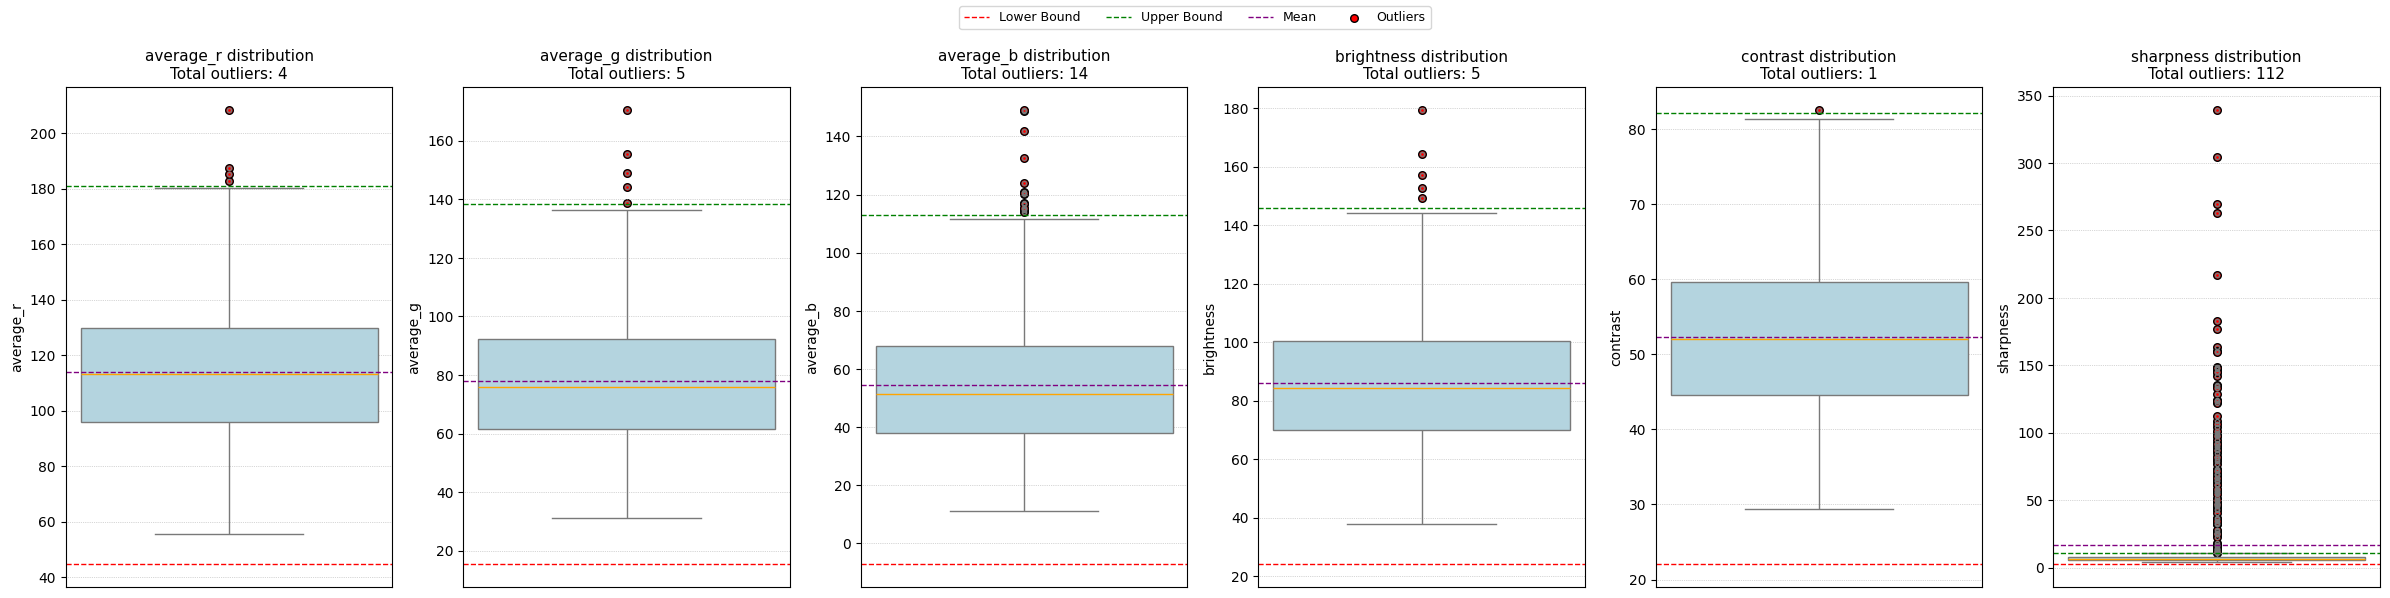

In [6]:
draw_box_plot_iqr(dataset_negative_pd, ['average_r', 'average_g', 'average_b', 'brightness', 'contrast', 'sharpness'])

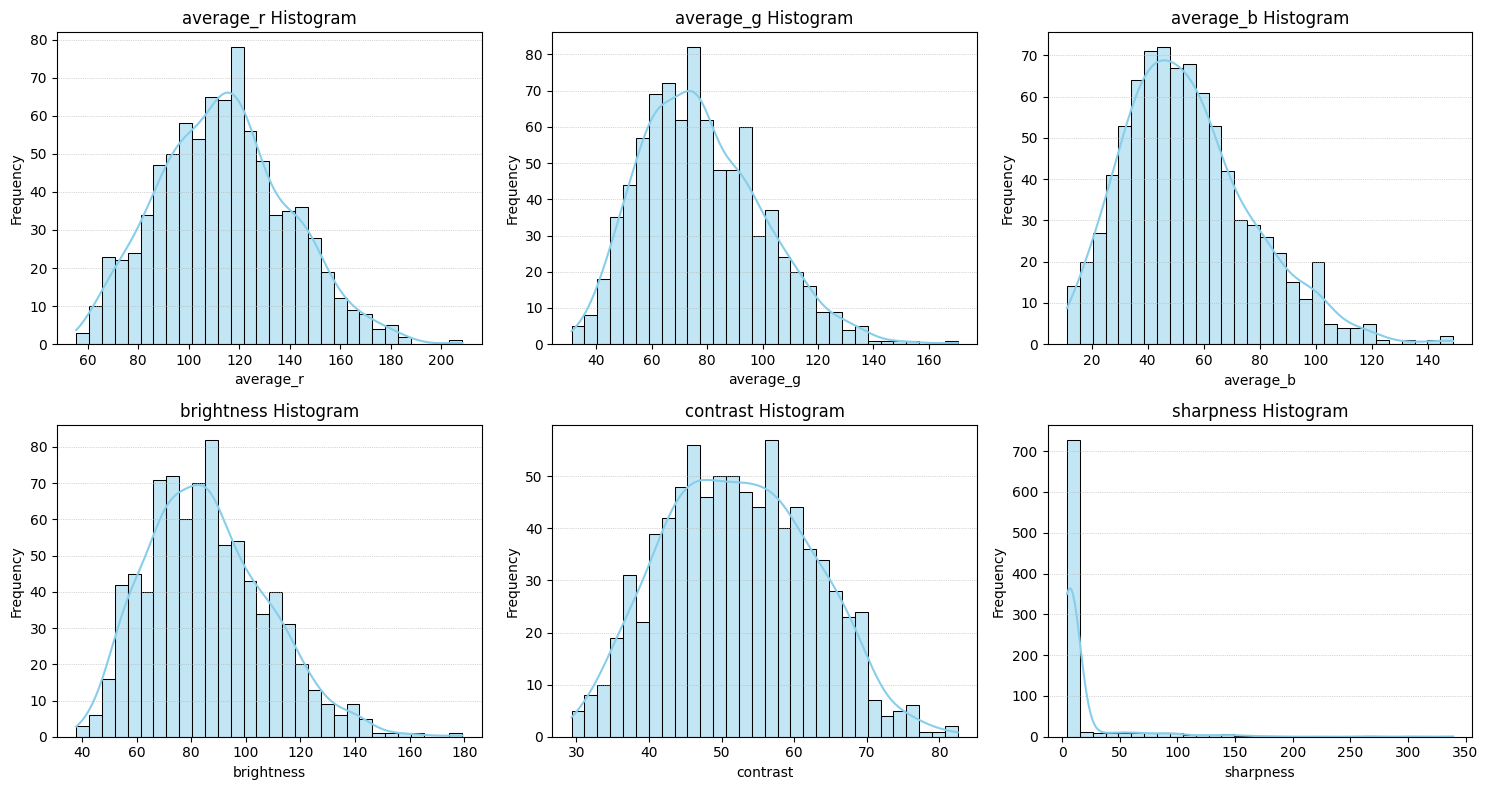

In [7]:
draw_histogram_distribution(dataset_negative_pd, ['average_r', 'average_g', 'average_b', 'brightness', 'contrast', 'sharpness'])

In [8]:
# dataset_negative_pd

In [9]:
# dataset_positive_pd

In [10]:
positive_total_channel_average = get_total_channel_average(dataset_positive_pd)
negative_total_channel_average = get_total_channel_average(dataset_negative_pd)

positive_total_channel_std = get_total_channel_std(dataset_positive_pd)
negative_total_channel_std = get_total_channel_std(dataset_negative_pd)

print("Positive Dataset - Average Color Channels:")
print(f"Red: {positive_total_channel_average[0]} \nGreen: {positive_total_channel_average[1]} \nBlue: {positive_total_channel_average[2]}")
print("\nPositive Dataset - Standard Deviation of Color Channels:")
print(f"Red: {positive_total_channel_std[0]} \nGreen: {positive_total_channel_std[1]} \nBlue: {positive_total_channel_std[2]}")

print("\nNegative Dataset - Average Color Channels:")
print(f"Red: {negative_total_channel_average[0]} \nGreen: {negative_total_channel_average[1]} \nBlue: {negative_total_channel_average[2]}")
print("\nNegative Dataset - Standard Deviation of Color Channels:")
print(f"Red: {negative_total_channel_std[0]} \nGreen: {negative_total_channel_std[1]} \nBlue: {negative_total_channel_std[2]}")

Positive Dataset - Average Color Channels:
Red: 113.12045367079003 
Green: 82.51079493960499 
Blue: 64.61482749992106

Positive Dataset - Standard Deviation of Color Channels:
Red: 25.319483123389578 
Green: 19.742138369959218 
Blue: 22.662257843261084

Negative Dataset - Average Color Channels:
Red: 113.94264171428287 
Green: 77.81635742521736 
Blue: 54.491287969384004

Negative Dataset - Standard Deviation of Color Channels:
Red: 25.5317536244903 
Green: 21.720416875708192 
Blue: 23.06939017723536


In [ ]:
img_quality_positive_data = analyze_image_quality_batch_with_flags(
    dir_path + '/' + dataset_positive_key,
    # limit=10,
    blurry_thresh=10,
    dark_thresh=50,
    overexposed_thresh=220
)

dataset_positive_pd['is_blurry'] = img_quality_positive_data['is_blurry']
dataset_positive_pd['is_dark'] = img_quality_positive_data['is_dark']
dataset_positive_pd['is_overexposed'] = img_quality_positive_data['is_overexposed']

In [ ]:
img_quality_negative_data = analyze_image_quality_batch_with_flags(
    dir_path + '/' + dataset_negative_key,
    # limit=10,
    blurry_thresh=10,
    dark_thresh=50,
    overexposed_thresh=220
)

dataset_negative_pd['is_blurry'] = img_quality_negative_data['is_blurry']
dataset_negative_pd['is_dark'] = img_quality_negative_data['is_dark']
dataset_negative_pd['is_overexposed'] = img_quality_negative_data['is_overexposed']

In [13]:
# check if filename total and std already exists
if 'total' in dataset_positive_pd['filename'].values or 'std' in dataset_positive_pd['filename'].values:
    dataset_positive_pd = dataset_positive_pd[~dataset_positive_pd['filename'].isin(['total', 'std'])]
if 'total' in dataset_negative_pd['filename'].values or 'std' in dataset_negative_pd['filename'].values:
    dataset_negative_pd = dataset_negative_pd[~dataset_negative_pd['filename'].isin(['total', 'std'])]

dataset_positive_pd = pd.concat([dataset_positive_pd, pd.DataFrame({
    'filename': 'total',
    'label': 'average',
    'average_r': [positive_total_channel_average[0]],
    'average_g': [positive_total_channel_average[1]],
    'average_b': [positive_total_channel_average[2]],
})])
dataset_positive_pd = pd.concat([dataset_positive_pd, pd.DataFrame({
    'filename': 'std',
    'label': 'average',
    'average_r': [positive_total_channel_std[0]],
    'average_g': [positive_total_channel_std[1]],
    'average_b': [positive_total_channel_std[2]],
})])

dataset_negative_pd = pd.concat([dataset_negative_pd, pd.DataFrame({
    'filename': 'total',
    'label': 'average',
    'average_r': [negative_total_channel_average[0]],
    'average_g': [negative_total_channel_average[1]],
    'average_b': [negative_total_channel_average[2]],
})])
dataset_negative_pd = pd.concat([dataset_negative_pd, pd.DataFrame({
    'filename': 'std',
    'label': 'average',
    'average_r': [negative_total_channel_std[0]],
    'average_g': [negative_total_channel_std[1]],
    'average_b': [negative_total_channel_std[2]],
})])


with pd.ExcelWriter(dataset_save_filename, engine='openpyxl') as writer:
    dataset_positive_pd.to_excel(writer, sheet_name='Positive', index=False)
    dataset_negative_pd.to_excel(writer, sheet_name='Negative', index=False)
